In [1]:
import tensorflow as tf # type: ignore
import os

In [2]:
# Check GPU availability
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPUs Available: ", len(gpus))
    print("GPU Details: ", gpus)
else:
    print("No GPUs Available.")

No GPUs Available.


In [4]:
# Check CPU availability
cpu = tf.config.list_physical_devices('CPU')
if gpus:
    print("CPUs Available: ", len(cpu))
    print("CPU Details: ", cpu)
else:
    print("No CPUs Available.")

No CPUs Available.


In [7]:
import cv2 # type: ignore
import imghdr
from matplotlib import pyplot as plt # type: ignore

C:\Users\shatn\AppData\Local\Temp\ipykernel_20060\2730493849.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [8]:
# Define the directory containing your training data
data_dir = r'mnist_png/training'  # Adjust the path as necessary

# List the classes (subdirectories)
class_names = os.listdir(data_dir)
print("Class names:", class_names)  # This will print the names of the classes (0-9)

# Create a list to hold image paths and labels
image_paths = []
labels = []

# Loop through each class directory
for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)


Class names: ['2', '3', '5']


In [9]:
image_exts = ['jpeg','jpg','bmp','png']

In [10]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [11]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [12]:
import numpy as np # type: ignore
from matplotlib import pyplot as plt # type: ignore

In [13]:
data = tf.keras.utils.image_dataset_from_directory(data_dir, batch_size=8, image_size=(28,28), label_mode='int') # the smaller batch size the better. the greater batch size the faster. the ideal batch size is 32

Found 17510 files belonging to 3 classes.


In [14]:
# Assuming 'data' is your dataset
data_iterator = data.as_numpy_iterator()

In [15]:
#get another batch from the iterator
batch = data_iterator.next()

In [16]:
# images as numpy arrays
batch[0].shape # Should print something like (256, height, width, channels)

(8, 28, 28, 3)

In [17]:
#class 0 = class one is for 2 
#class 1 = class two is for 3 
#class 2 = class three is for 5
batch[1] # Should print the labels for the 256 images

array([2, 2, 0, 2, 1, 2, 2, 1])

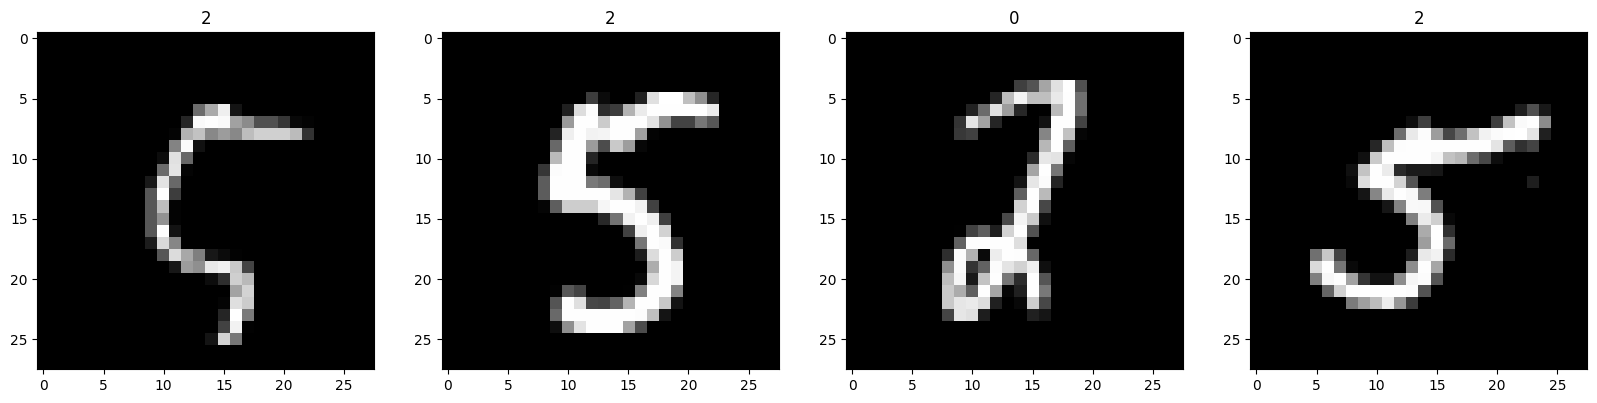

In [18]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [19]:
scaled = batch[0] / 255

In [20]:
scaled.max()

1.0

In [21]:
scaled.min()

0.0

In [22]:
if batch[0].max() == 255:
    data = data.map(lambda x, y: (x / 255, y))
    batch = data.as_numpy_iterator().next()
    print('have been changed')
    print('batch[0].max() = ' + str(batch[0].max()))
    print('batch[0].min() = ' + str(batch[0].min()))
else:
    print('no changes')
    print('batch[0].max() = ' + str(batch[0].max()))
    print('batch[0].min() = ' + str(batch[0].min()))

have been changed
batch[0].max() = 1.0
batch[0].min() = 0.0


In [23]:
scaled_iterator = data.as_numpy_iterator()

In [24]:
batch = scaled_iterator.next()

In [25]:
batch[0].max()

1.0

In [26]:
batch[0].min()

0.0

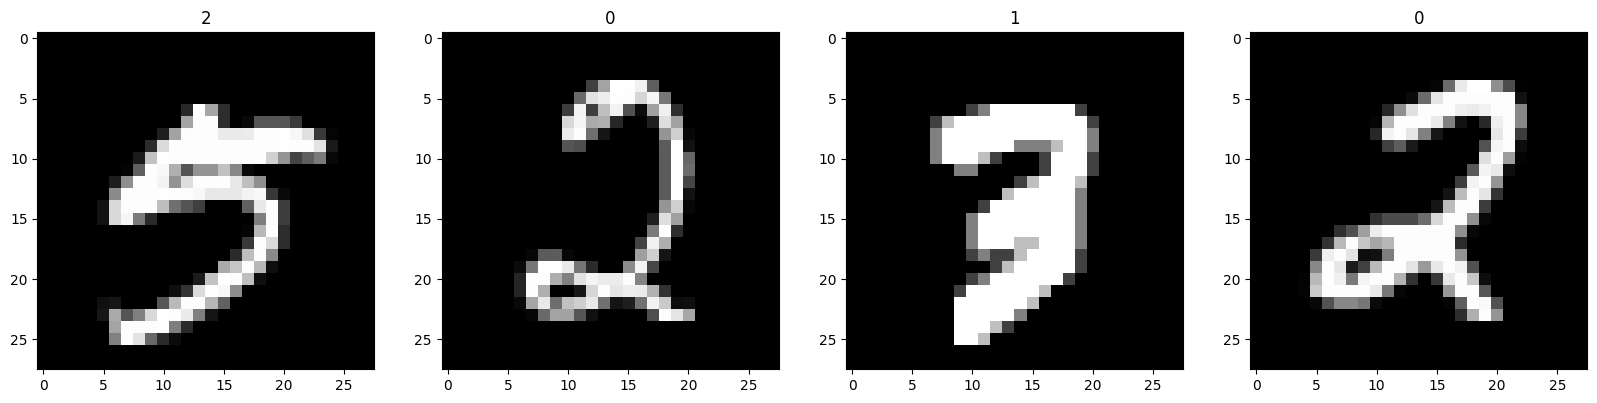

In [27]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [28]:
len(data)

2189

In [29]:
train_size = int(len(data)*.75)
val_size = int(len(data)*.1)+1
test_size = int(len(data)*0.15)+1

In [30]:
train_size + val_size + test_size

2189

In [31]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [32]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten # type: ignore
from tensorflow.keras.utils import to_categorical # type: ignore

In [33]:
model = Sequential()

In [34]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(28,28,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))


C:\Users\shatn\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,835 (57.95 KB)

 Trainable params: 14,835 (57.95 KB)

 Non-trainable params: 0 (0.00 B)

In [87]:
from datetime import datetime

# Get the current date and time
current_date = datetime.now()

# Format the date string with microseconds
formatted_date = current_date.strftime('%d.%h.%Y') + '.' + current_date.strftime('(%H.%M.%S)') + '.' + str(current_date.microsecond)

print("Formatted date with microseconds:", formatted_date)

Formatted date with microseconds: 11.Nov.2024.(09.46.01).132717


In [88]:
logdir = fr'log_for_MNIST Training{str(formatted_date)}' # change it to any log file if u were working on this file

In [41]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [42]:
batch[0].max()

1.0

In [43]:
batch[0].min()

0.0

In [44]:
hist = model.fit(train, epochs=4, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/4
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8882 - loss: 0.2606 - val_accuracy: 0.9749 - val_loss: 0.0820
Epoch 2/4
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9826 - loss: 0.0498 - val_accuracy: 0.9863 - val_loss: 0.0367
Epoch 3/4
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9888 - loss: 0.0298 - val_accuracy: 0.9823 - val_loss: 0.0609
Epoch 4/4
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9924 - loss: 0.0249 - val_accuracy: 0.9852 - val_loss: 0.0508


In [45]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

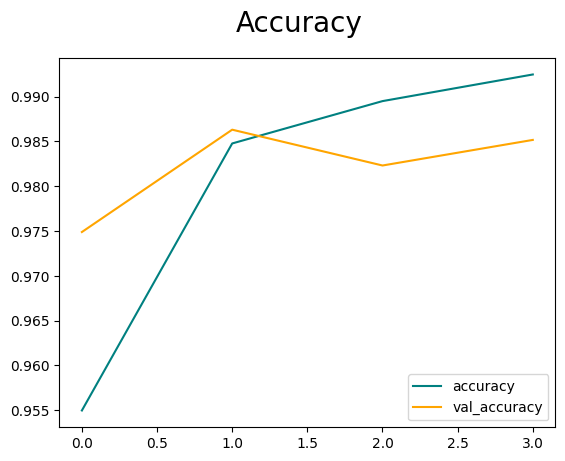

In [46]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="lower right") # 4 options: lower left, lower right, upper left, upper right
plt.show()

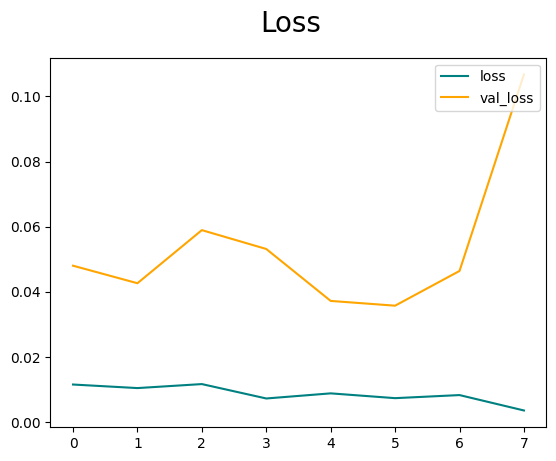

In [96]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper right") # 4 options: lower left, lower right, upper left, upper right
plt.show()

In [97]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy # type: ignore

In [98]:
Precision = Precision()
Recall = Recall()
BinAccuracy = BinaryAccuracy()

In [99]:
len(test)

329

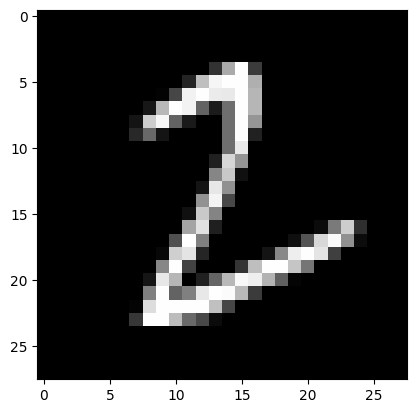

In [103]:
img = cv2.imread(r'mnist_png/testing/2/38.png') # change this to image dir
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

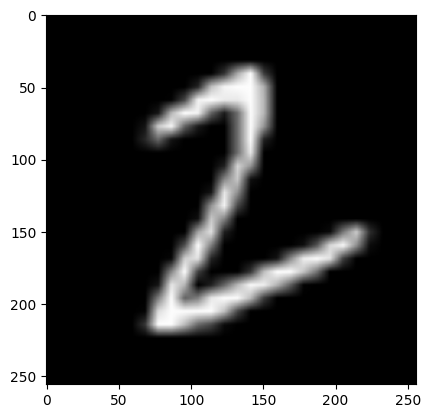

In [104]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [105]:
np.expand_dims(resize, 0)

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)

In [110]:
# Resize the image to match the input shape expected by the model
resize_resized = cv2.resize(resize, (28, 28))

# Normalize the resized image and expand dimensions for prediction
yhat = model.predict(np.expand_dims(resize_resized.astype("float32") / 255.0, axis=0))

1/1 [==============================] - 0s 192ms/step


In [ ]:
yhat
# *[this is for class 0, this is for class 1, this is for class 2]
# *[2, 3, 5]


array([[1.000000e+00, 2.595297e-15, 5.787185e-22]], dtype=float32)

In [114]:
# Get the class with the highest prediction probability
predicted_class = tf.argmax(yhat, axis=1).numpy()[0]

# Map the predicted class index to your custom labels
label_map = {0: 2, 1: 3, 2: 5}  # Adjust the index if necessary based on your data setup

# Determine the predicted label
predicted_label = label_map.get(predicted_class, "Unknown")

# Output the result based on the predicted label
if predicted_label == 2:
    print(f"Image has been Classified as Class 0 (e.g., Number 2 Detected)")
elif predicted_label == 3:
    print(f"Image has been Classified as Class 1 (e.g., Number 3 Detected)")
elif predicted_label == 4:
    print(f"Image has been Classified as Class 2 (e.g., Number 5 Detected)")
else:
    print("Prediction Error: Unknown class label.")

Image has been Classified as Class 0 (e.g., Number 2 Detected)


In [ ]:
from tensorflow.keras.models import load_model # type: ignore

In [119]:
modelName = 'MNIST First Trained CNN'

In [120]:
model.save(os.path.join(r'models',fr'{modelName}')) # choose the dir that u want to save ur model at

INFO:tensorflow:Assets written to: models\MNIST First Trained CNN\assets


INFO:tensorflow:Assets written to: models\MNIST First Trained CNN\assets


In [122]:
newModel = load_model(os.path.join(r'models', fr'{modelName}')) # choose the dir that u want to load ur model from

In [125]:
yhattest = newModel.predict(np.expand_dims(resize_resized.astype("float32") / 255.0, axis=0))

1/1 [==============================] - 0s 92ms/step


In [126]:
# Get the class with the highest prediction probability
predicted_class = tf.argmax(yhattest, axis=1).numpy()[0]

# Map the predicted class index to your custom labels
label_map = {0: 2, 1: 3, 2: 5}  # Adjust the index if necessary based on your data setup

# Determine the predicted label
predicted_label = label_map.get(predicted_class, "Unknown")

# Output the result based on the predicted label
if predicted_label == 2:
    print(f"Image has been Classified as Class 0 (e.g., Number 2 Detected)")
elif predicted_label == 3:
    print(f"Image has been Classified as Class 1 (e.g., Number 3 Detected)")
elif predicted_label == 4:
    print(f"Image has been Classified as Class 2 (e.g., Number 5 Detected)")
else:
    print("Prediction Error: Unknown class label.")

Image has been Classified as Class 0 (e.g., Number 2 Detected)


In [127]:
import pandas as pd # type: ignore

# Extracting the metrics
epochs = range(1, len(hist.history['accuracy']) + 1)
accuracy = hist.history['accuracy']
validation_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
validation_loss = hist.history['val_loss']

# Creating a DataFrame with the desired columns
df = pd.DataFrame({
    'Epochs': epochs,
    'Accuracy': accuracy,
    'Validation Accuracy': validation_accuracy,
    'Loss': loss,
    'Validation Loss': validation_loss
})

# Saving the DataFrame to a CSV file
df.to_csv(rf'MNIST First Trained CNN', index=False)